In [10]:
import pandas as pd
import os
from glob import glob
from tqdm import tqdm
from ast import literal_eval
import random
tqdm.pandas()
import matplotlib.pyplot as plt

# Load data

In [2]:
root = '/scratch/tsoares/wikidumps/simplewiki-NS0-20230901/processed_data/'
files = glob(os.path.join(root, 'good_links_*.parquet'))
files

['/scratch/tsoares/wikidumps/simplewiki-NS0-20230901/processed_data/good_links_1.parquet',
 '/scratch/tsoares/wikidumps/simplewiki-NS0-20230901/processed_data/good_links_0.parquet']

In [3]:
df = pd.concat([pd.read_parquet(f) for f in tqdm(files)]).reset_index(drop=True)

100%|██████████| 2/2 [00:21<00:00, 10.76s/it]


In [4]:
df

,target_title,target_section,source_title,target_ID,target_QID,source_ID,source_QID,source_version,mention,source_section,...,source_page_length,link_section_depth,context,context_sentence_start_index,context_sentence_end_index,context_mention_start_index,context_mention_end_index,context_span_start_index,context_span_end_index,current_links
0,Leap_year,Lead,October_10,434,Q19828,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,leap years,Lead,...,170177,0.0.0,October 10 is the 283rd day of the year (284th...,0.0,88.0,50.0,60.0,0.0,143.0,"{'Gregorian_calendar': {'region': 'sentence', ..."
1,Gregorian_calendar,Lead,October_10,12159,Q12138,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,Gregorian calendar,Lead,...,170177,0.0.0,October 10 is the 283rd day of the year (284th...,0.0,88.0,69.0,87.0,0.0,143.0,"{'Leap_year': {'region': 'sentence', 'count': 1}}"
2,19,Lead,October_10,51220,Q23761,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,19,Events,...,170177,1.0.0,Events\n19 - Roman general Germanicus dies und...,7.0,106.0,7.0,9.0,0.0,365.0,"{'Germanicus': {'region': 'sentence', 'count':..."
3,Germanicus,Lead,October_10,58348,Q191039,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,Germanicus,Events,...,170177,1.0.0,Events\n19 - Roman general Germanicus dies und...,7.0,106.0,26.0,36.0,0.0,365.0,"{'19': {'region': 'sentence', 'count': 1}, 'An..."
4,Antioch,Lead,October_10,59366,Q200441,10067,Q2921,https://simple.wikipedia.org/w/index.php?title...,Antioch,Events,...,170177,1.0.0,Events\n19 - Roman general Germanicus dies und...,7.0,106.0,76.0,83.0,0.0,177.0,"{'Germanicus': {'region': 'sentence', 'count':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580661,German_reunification,Lead,October_3,32070,Q56039,9944,Q2931,https://simple.wikipedia.org/w/index.php?title...,German reunification,Observances,...,206125,4.0.0,"Observances\n Unity Day (Germany), marking the...",13.0,76.0,46.0,66.0,0.0,155.0,"{'Germany': {'region': 'sentence', 'count': 1}..."
2580662,1990,Lead,October_3,8905,Q2064,9944,Q2931,https://simple.wikipedia.org/w/index.php?title...,1990,Observances,...,206125,4.0.0,"Observances\n Unity Day (Germany), marking the...",13.0,76.0,70.0,74.0,0.0,155.0,{'German_reunification': {'region': 'sentence'...
2580663,South_Korea,Lead,October_3,5073,Q884,9944,Q2931,https://simple.wikipedia.org/w/index.php?title...,South Korea,Observances,...,206125,4.0.0,"Observances\n Unity Day (Germany), marking the...",77.0,107.0,93.0,104.0,0.0,155.0,"{'1990': {'region': 'span', 'count': 1}, 'Germ..."
2580664,Iraq,Lead,October_3,26175,Q796,9944,Q2931,https://simple.wikipedia.org/w/index.php?title...,Iraq,Observances,...,206125,4.0.0,"Observances\n Unity Day (Germany), marking the...",108.0,129.0,122.0,126.0,77.0,155.0,"{'South_Korea': {'region': 'span', 'count': 1}..."


# Analyze links in context

## Distribution of links per context

In [5]:
df['number_current_links'] = df['current_links'].progress_apply(lambda x: x.count("'region'"))

100%|██████████| 2580666/2580666 [00:06<00:00, 429319.14it/s]


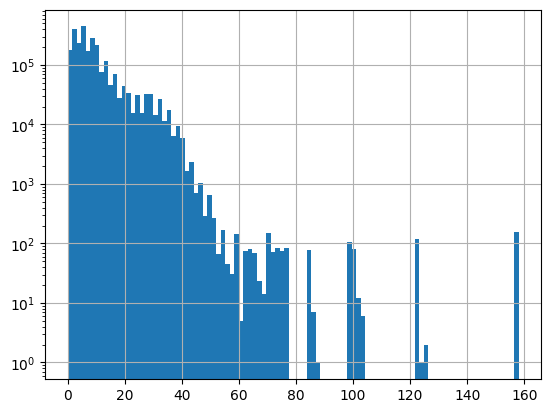

In [6]:
df['number_current_links'].hist(bins=100)
plt.yscale('log')

In [7]:
df['number_current_links'].describe()

count    2.580666e+06
mean     9.221044e+00
std      8.436936e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.200000e+01
max      1.580000e+02
Name: number_current_links, dtype: float64

## Look at some actual results

In [8]:
for i in range(20):
    sample = df.sample(1)
    source_title = sample['source_title'].values[0]
    target_title = sample['target_title'].values[0]
    mention = sample['mention'].values[0]
    context = sample['context'].values[0]
    current_links = literal_eval(sample['current_links'].values[0])
    print(f'Source title: {source_title}')
    print(f'Target title: {target_title}')
    print(f'Mention: {mention}')
    print(f'Context: {context}')
    for column in sample:
        if 'index' in column:
            print(f'{column}: {sample[column].values[0]}')
    for target in current_links:
        print(f'Context link: {target}')
        print(f'Data: {current_links[target]}')
        print('---')
    print('#############################################')

Source title: Sun_bear
Target title: Fruit
Mention: fruit
Context: Life
Sun bears mostly live in tropic rainforests. They are mostly active at night, and they stay in trees a lot of the time. It eats a lot of different things: fruit and other plants, eggs, honey and insects. They also eat small vertebrate animals, like reptiles, birds and mammals. After a pregnancy of 96 days the female gives birth to 1-2 babies. Young sun bears become mature when they are 3-4 years old. sun bears can become up to 28 years old when in captivity (held by humans, e.g. in zoos). Sun bears do not hibernate.
link_start_index: 8833
link_end_index: 8902
sentence_start_index: 8784
sentence_end_index: 9219
context_sentence_start_index: 125.0
context_sentence_end_index: 208.0
context_mention_start_index: 160.0
context_mention_end_index: 165.0
context_span_start_index: 50.0
context_span_end_index: 282.0
Context link: Tree
Data: {'region': 'span', 'count': 1}
---
Context link: Tropical_rainforest
Data: {'region': 

# Look at positive and negative contexts

In [9]:
df_ml = pd.read_parquet('/dlabdata1/tsoares/wikidumps/simplewiki-NS0-20231001/ml_data/simple_stage_1/train/')

In [13]:
for i in range(10):
    sample = df_ml.sample(1)
    source_title = sample['source_title'].values[0]
    target_title = sample['target_title'].values[0]
    context = sample['link_context'].values[0]
    current_links = literal_eval(sample['current_links'].values[0])
    negative_index = random.randint(0, 8)
    negative_context = sample[f'link_context_neg_{negative_index}'].values[0]
    negative_current_links = literal_eval(sample[f'current_links_neg_{negative_index}'].values[0])
    print(f'Source Title: {source_title}')
    print(f'Target Title: {target_title}')
    print(f'Context: {context}')
    print('Current Links:')
    for target_title in current_links:
        print(f'\t{target_title}')
    print(f'Negative Context: {negative_context}')
    print('Negative Current Links:')
    for target_title in negative_current_links:
        print(f'\t{target_title}')
    print('#############################################')

Source Title: Vittorio Gregotti
Target Title: New town
Context: Vittorio Gregotti (10 August 1927 – 15 March 2020) was an Italian architect and urbanist. He was head of the Gregotti Associati studio. His studio has designed several important buildings, such as the Barcelona Olympic Stadium, the Belém Cultural Center in Lisbon, the Arcimboldi Opera Theater in Milan and several university campuses, including that of the University of Calabria. His studio also designed Pujiang New Town in Shanghai, China, a new town with an Italian architectural theme. Gregotti died of pneumonia caused by COVID-19 at a hospital in Milan on 15 March 2020, aged 92.
Current Links:
	Shanghai
	Milan
	Lisbon
	Urbanism
	Architect
	Italy
	Pneumonia
	COVID-19
Negative Context: Location Toledo is in the Northwest part of Ohio. The city is at the west end of Lake Erie, where the Maumee River meets the lake. The area of Ohio where Toledo sits is very flat and is known for its many farm fields.
Negative Current Links: